# Notebook for some quick plotting

In [ ]:
from os import path

import matplotlib.pyplot as plt
import pandas as pd


def plot_quantiles( beecs_file, out_dir, format):
    data_beecs = pd.read_csv(beecs_file, delimiter=";")

    columns = list(data_beecs.columns)[1:]
    columns = pd.unique([c[:-4] for c in columns])
    quantiles = [
        ("Q05", 5),
        ("Q10", 10),
        ("Q25", 25),
        ("Q50", 50),
        ("Q75", 75),
        ("Q90", 90),
        ("Q95", 95),
    ]

    fig, ax = plt.subplots(figsize=(10, 4))

    for col in columns:
        plot_column(
            data_beecs,
            col,
            quantiles,
            path.join(out_dir, col + "." + format),
        )


def plot_column( data_beecs, column, quantiles, image_file):
    median_col = quantiles[len(quantiles) // 2][0]

    fig, ax = plt.subplots(figsize=(10, 4))
    for data, col, model in [
        (data_beecs, "blue", "beecs"),
    ]:
        q50 = data[column + "_Q50"]
        q10 = data[column + "_Q05"]
        q90 = data[column + "_Q95"]

        ax.plot(data.ticks, q50, c=col, label=model)
        ax.fill_between(data.ticks, q10, q90, color=col, alpha=0.1)

    ax.set_title(column)
    ax.set_xlabel("time [d]", fontsize="12")
    ax.legend()
    fig.tight_layout()

    plt.savefig(image_file)
    plt.close()



plot_quantiles(
        "_tests/Rothamsted2009_fenoxycarb_3days_later/beecs_Nursebees.csv",
        "_tests/py",
        #"png",
        "svg",
)


C:\Users\Wally\AppData\Local\Temp\ipykernel_12996\1211850011.py:6: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  columns = pd.unique([c[:-4] for c in columns])


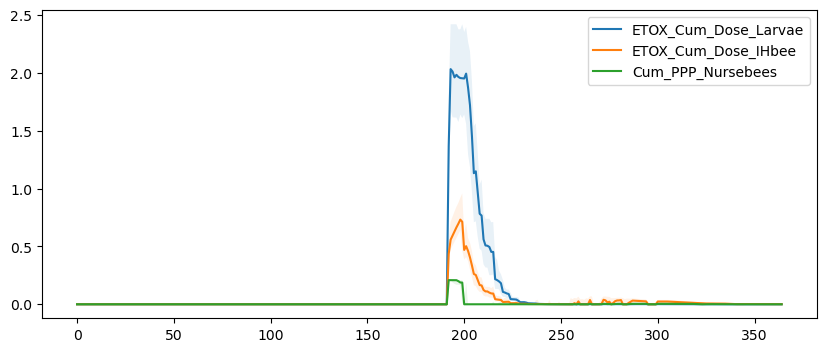

In [29]:
data_beecs_nurse = pd.read_csv("beecs_Nursebees.csv", sep=r'\s*;\s*', engine='python')
data_beecs = pd.read_csv("beecs.csv", sep=r'\s*;\s*', engine='python')
datas = [data_beecs_nurse, data_beecs]

columns = list(data_beecs.columns)[1:]
columns = pd.unique([c[:-4] for c in columns])
quantiles = [
    ("Q05", 5),
    ("Q10", 10),
    ("Q25", 25),
    ("Q50", 50),
    ("Q75", 75),
    ("Q90", 90),
    ("Q95", 95),
]

fig, ax = plt.subplots(figsize=(10, 4))
plotcolumns = ["ETOX_Cum_Dose_Larvae", "ETOX_Cum_Dose_IHbee","Cum_PPP_Nursebees"]

#for data in datas:
for column in plotcolumns:
    q50 = data_beecs_nurse[column + "_Q50"]
    q10 = data_beecs_nurse[column + "_Q05"]
    q90 = data_beecs_nurse[column + "_Q95"]

    ax.plot(data_beecs_nurse.ticks, q50, label=column)
    ax.fill_between(data_beecs_nurse.ticks, q10, q90, alpha=0.1)

ax.legend()
